In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sampled-suicide-detection/Sampled_Suicide_Detection.csv


Random Sampling

In [ ]:
from google.colab import drive
import pandas as pd
from google.colab import files

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/suicide/Suicide_Detection.csv'
data = pd.read_csv(file_path)

sampled_data = data.sample(n=5000, random_state=1)
sampled_path = '/content/drive/My Drive/suicide/Sampled_Suicide_Detection.csv'

sampled_data.to_csv(sampled_path, index=False)
files.download(sampled_path)

In [ ]:

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Text processing
import string

# Natural Language Toolkit
import nltk
from nltk.stem import PorterStemmer

# Operating System related functions
import os
# Data manipulation
import numpy as np

import pandas as pd

import csv
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Serialization (saving and loading models)
import pickle
from sklearn.svm import SVC
# Machine learning tools
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import (
    RandomForestClassifier, VotingClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
data = pd.read_csv('/kaggle/input/sampled-suicide-detection/Sampled_Suicide_Detection.csv')

data.head()

,Unnamed: 0,text,class
0,119662,I want to go to sleep and never wake upMy reas...,suicide
1,275680,"YO, IVE DONE SOMETHING ive started my own webt...",non-suicide
2,339428,the sun is setting and it's raining i'm curren...,non-suicide
3,152176,Hi. Im scared. Plz talk to me.Private message,suicide
4,39600,Feeling of hope/worthlessnessThis is a stupid ...,suicide


object


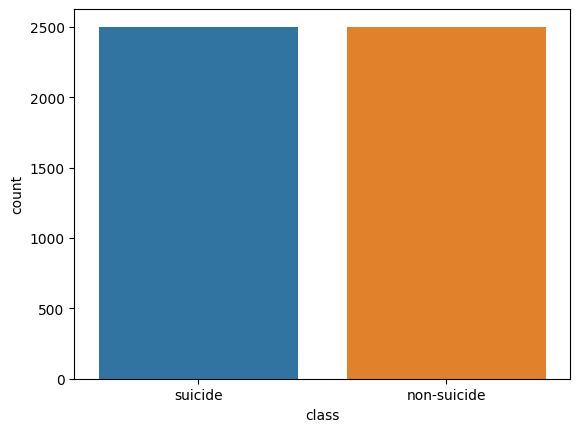

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/sampled-suicide-detection/Sampled_Suicide_Detection.csv')

print(data['class'].dtype)

data = data.dropna(subset=['class'])
data['class'] = data['class'].astype(str)

sns.countplot(x=data['class'])
plt.show()


Data Preprocessing

In [ ]:
data['Length'] = data['text'].apply(lambda x: len(x.split(' ')))
data['Length'].describe()

count    5000.000000
mean      132.464000
std       258.469782
min         1.000000
25%        26.000000
50%        59.500000
75%       152.000000
max      9684.000000
Name: Length, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   text        5000 non-null   object
 2   class       5000 non-null   object
 3   Length      5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [ ]:
data['Unnamed: 0'].is_unique

True

In [ ]:
data.isnull().sum()
data.duplicated().sum()

0

In [ ]:
data['text']= data['text'].str.lower()
data['text'] = data['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [ ]:
#stop word removal
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
#tokenization
data['text'] = data['text'].apply(lambda x:nltk.word_tokenize(x))

In [ ]:
#steming
ps = PorterStemmer()
data['text'] = data['text'].apply(lambda x : [ps.stem(i) for i in x])

In [ ]:
data['text']=data['text'].apply(lambda x : ' '.join(x))
data.head()

,Unnamed: 0,text,class,Length
0,119662,want go sleep never wake upmi reason might mak...,suicide,96
1,275680,yo ive done someth ive start webtoon httpswwww...,non-suicide,38
2,339428,sun set rain im current listen sad pov song yo...,non-suicide,24
3,152176,hi im scare plz talk mepriv messag,suicide,8
4,39600,feel hopeworthlessnessthi stupid reason feel w...,suicide,253


Machine Learning

In [ ]:
x,y = data['text'],data['class']

TF-IDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [ ]:
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

In [ ]:
X_train.shape,X_test.shape

((4000, 840), (1000, 840))

Naive bayes classifier

In [ ]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()

VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'hard')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))
#

Training score: 0.8955
Testing score: 0.866


              precision    recall  f1-score   support

 non-suicide       0.88      0.86      0.87       511
     suicide       0.86      0.87      0.86       489

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

F1 Score: 0.8660160823158535


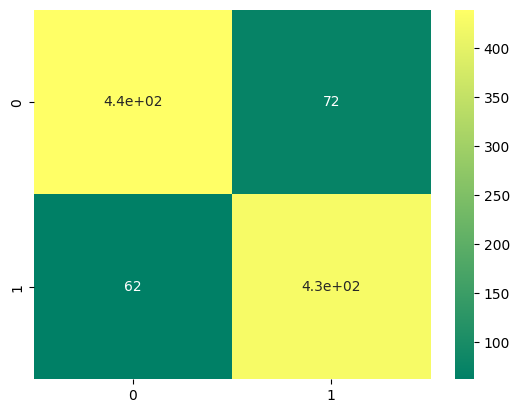

In [ ]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))
f1_n = f1_score(y_test, y_pred, average="weighted")
print("F1 Score:", f1_n)

Random Forest

In [ ]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(X_train, y_train)

print('Training score:',classifiers.score(X_train, y_train))

print('Testing score:',classifiers.score(X_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.803
Testing score: 0.799
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       n_estimators=5)


              precision    recall  f1-score   support

 non-suicide       0.75      0.90      0.82       511
     suicide       0.87      0.69      0.77       489

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000



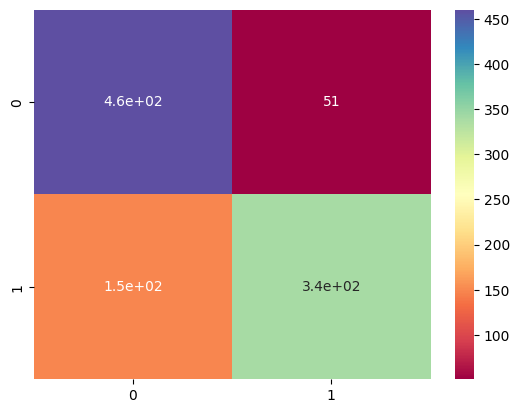

In [ ]:
y_act=y_test
y_pred=classifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))
f1_rn = f1_score(y_test, y_pred, average="weighted")

Decision Tree

In [ ]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(X_train, y_train)

print("Training Accuracy: ", model2.score(X_train, y_train))
print("Test Accuracy: ", model2.score(X_test,y_test))
print


Training Accuracy:  0.73675
Test Accuracy:  0.726


<function print>

              precision    recall  f1-score   support

 non-suicide       0.75      0.70      0.72       511
     suicide       0.71      0.75      0.73       489

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000

0.7258881918996335


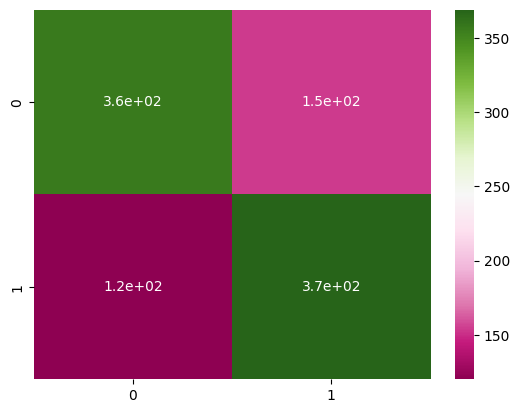

In [ ]:
y_act=y_test
y_pred=model2.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))
f1_dt = f1_score(y_test, y_pred, average="weighted")
print(f1_dt)

SVM


SVM Training score: 0.90975
SVM Testing score: 0.884

SVM Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.87      0.90      0.89       511
     suicide       0.90      0.86      0.88       489

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



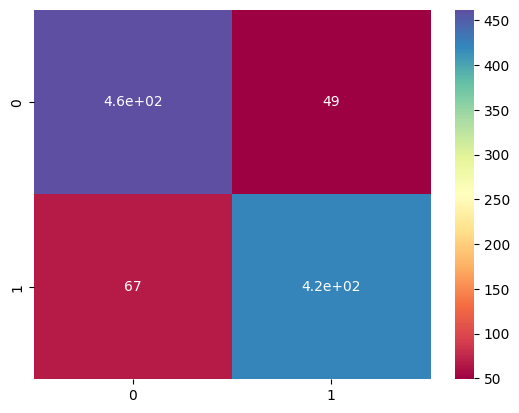

In [ ]:
svm_classifier = SVC(kernel="sigmoid",random_state=10)
svm_classifier.fit(X_train, y_train)

print('\nSVM Training score:', svm_classifier.score(X_train, y_train))
print('SVM Testing score:', svm_classifier.score(X_test, y_test))


y_act_svm = y_test
y_pred_svm = svm_classifier.predict(X_test)
sns.heatmap(confusion_matrix(y_act_svm, y_pred_svm), annot=True, cmap='Spectral')
print('\nSVM Classification Report:')
print(classification_report(y_act_svm, y_pred_svm))
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")

Gradient Boosting

In [ ]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))


Training score: 0.99575
Testing score: 0.804


              precision    recall  f1-score   support

 non-suicide       0.80      0.82      0.81       511
     suicide       0.81      0.79      0.80       489

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000

0.8039010878098014


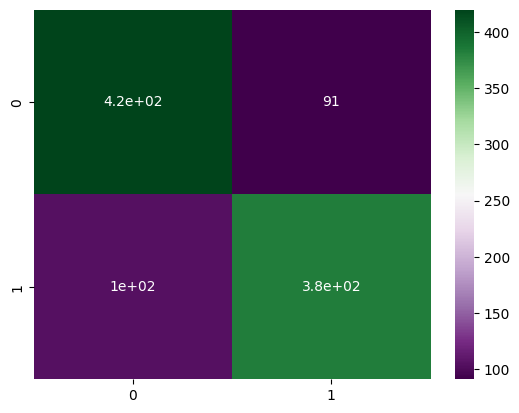

In [ ]:
y_act=y_test
y_pred=model3.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

f1_gd = f1_score(y_test, y_pred, average="weighted")
print(f1_gd)

k-nearest neighbors

In [ ]:
model = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[7],'metric':['manhattan','minkowski','cosine','tanimoto'],
                                                   'p':[1,2]},random_state=40,n_jobs=-1)
model.fit(X_train, y_train)

print('Training score:',model.score(X_train, y_train))

print('Testing score:',model.score(X_test,y_test))
print(model.best_estimator_)


Training score: 0.88275
Testing score: 0.846
KNeighborsClassifier(metric='cosine', n_neighbors=7, p=1)


              precision    recall  f1-score   support

 non-suicide       0.84      0.86      0.85       511
     suicide       0.85      0.83      0.84       489

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

0.8459506694855531


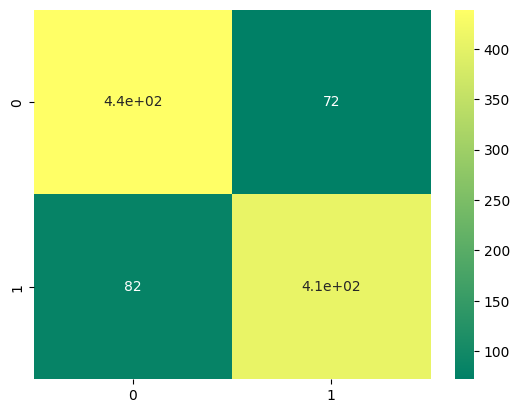

In [ ]:
y_act = y_test
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))
f1_kn = f1_score(y_test, y_pred, average="weighted")
print(f1_kn)

Report Analysis on Models

Maximum performed Model in Gold Colored label is SVM
Minimum performed Model in Blue Colored label is Decision  Tree


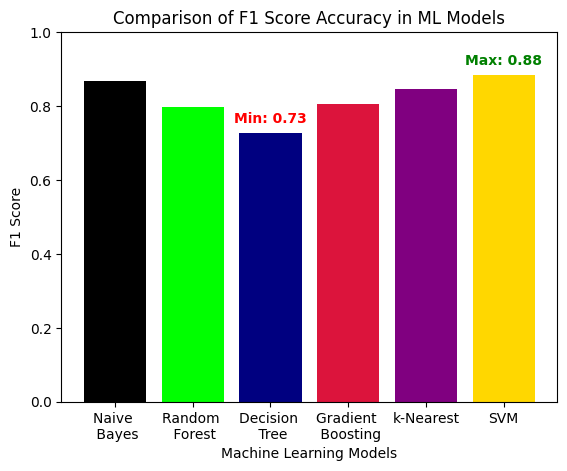

<Figure size 1200x800 with 0 Axes>

In [ ]:

models = ['Naive \n Bayes', 'Random \n Forest', 'Decision \n Tree', 'Gradient \n Boosting', 'k-Nearest',"SVM"]
modelsq = ['Naive Bayes', 'Random Forest', 'Decision  Tree', 'Gradient  Boosting', 'k-Nearest', "SVM"]
accuracy_scores = [f1_n, f1_rn, f1_dt, f1_gd, f1_kn, f1_svm]
colors = ['black', 'lime', 'navy', 'crimson', 'purple', 'red']

# Find the index of the max accuracy score
max_index = accuracy_scores.index(max(accuracy_scores))
min_index = accuracy_scores.index(min(accuracy_scores))

# Set a distinct color for the bar with the max value
colors[max_index] = 'gold'
colors[min_index] = "navy"

print("Maximum performed Model in Gold Colored label is", modelsq[max_index])
print("Minimum performed Model in Blue Colored label is", modelsq[min_index])

# Create the bar chart
plt.bar(models, accuracy_scores, color=colors)
plt.ylim(0, 1)

# Annotate the bar with the max value
plt.text(max_index, max(accuracy_scores) + 0.02, f'Max: {max(accuracy_scores):.2f}', ha='center', va='bottom', color='green', fontweight='bold')
plt.text(min_index, min(accuracy_scores) + 0.02, f'Min: {min(accuracy_scores):.2f}', ha='center', va='bottom', color='red', fontweight='bold')

# Set plot labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score Accuracy in ML Models')

# Show the plot
plt.show()
plt.gcf().set_size_inches(12, 8)


In [ ]:
print("From the above we can say that out of all models perforamce ,\n Naive Bayes (Voting Classifier) is best fit model for the dataset.")
print('* Training score:',VotingClassifiers.score(X_train, y_train))
print('* Testing score:',VotingClassifiers.score(X_test,y_test))

From the above we can say that out of all models perforamce ,
 Naive Bayes (Voting Classifier) is best fit model for the dataset.
* Training score: 0.8955
* Testing score: 0.866


In [ ]:
with open("best_model.pkl", 'wb') as f:
    pickle.dump(VotingClassifiers,f)

In [ ]:
def preprocess(inp):
    # Convert to lowercase
    inp = inp.lower()

    # Remove punctuation
    inp = inp.replace(r'[^\w\s]+', '')

    # Tokenize and remove stop words
    inp = [word for word in inp.split() if word not in stop_words]

    # Stemming
    inp = ' '.join([ps.stem(i) for i in inp])

    # Transform to vector form
    input_to_model = vectorizer.transform([inp]).toarray()

    return input_to_model


In [ ]:
def app(input_text):
    # Define the input text box
    print('Input : ',input_text) #take input from user
    processed_array = preprocess(input_text) #preprocess the text
    predict = VotingClassifiers.predict(processed_array) #Model prediction
    print('Output : ', predict[0])

In [ ]:
app(input())

 GUYS DON'T BREATHE OXYGEN! 100% of criminals have inhaled oxygen before the crime.  Just letting everyone here know for safety reasons.


Input :  GUYS DON'T BREATHE OXYGEN! 100% of criminals have inhaled oxygen before the crime.  Just letting everyone here know for safety reasons.
Output :  non-suicide


In [ ]:
app(input())

 overdose or hangingI'm 14 should I overdose or hang myself


Input :  overdose or hangingI'm 14 should I overdose or hang myself
Output :  suicide
